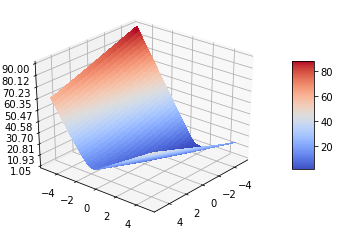

In [3]:
# 이 소스코드를 py 파일로 만들어서 실행해보자.
# rotation 실습

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

def sig(x):
    return 1/(1+np.exp(-x))

x = np.array([1,2,3,4,5,6])
t = np.array([0,0,0,1,1,1])
xt = np.array([[1,0],[2,0],[3,0],[4,1],[5,1],[6,1]])

n = 100
a = np.linspace(-5, 5, n)
b = np.linspace(-5, 5, n)
a, b = np.meshgrid(a, b)
cost1 = np.zeros((n, n)) # cross entropy function
for val in xt:
    temp = -val[1] * np.log(sig(a+b*val[0])) - (1-val[1]) * np.log(1-sig(a+b*val[0]))
    cost1 += temp

cost2 = np.zeros((n, n))
for val in xt:
    temp = (val[1]-sig(a+b*val[0]))**2 # error sums of squre function
    cost2 += temp


surf = ax.plot_surface(a, b, cost1, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(30, 40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
